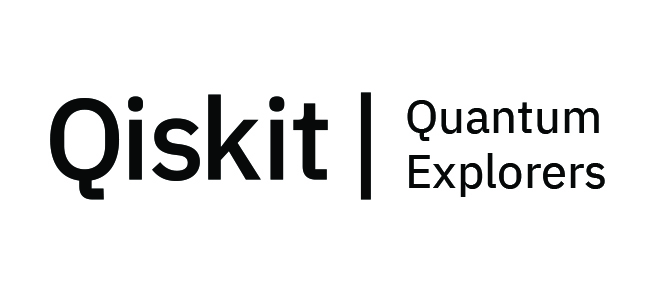

# Run Circuit on Simulator

You can use Qiskit's [Sampler primitive](https://qiskit.org/documentation/apidoc/primitives.html#overview-of-sampler) to calculate the probability distribution of bit strings from quantum circuits.

Result probability distribution: {'00': 0.4999999999999999, '11': 0.4999999999999999}


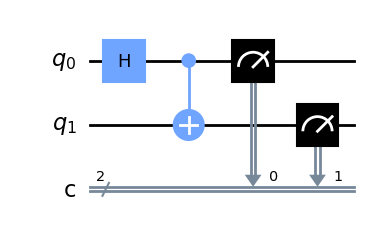

In [1]:
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler as QiskitSampler

# Create a simple quantum circuit 
circuit = QuantumCircuit(2, 2) # with 2 qubits and 2 classical bits
circuit.h(0) # Add a H gate on qubit 0
circuit.cx(0, 1) # Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.measure([0,1], [0,1]) # Map the quantum measurements to the classical bits

# Run the circuit using the Sampler primitive
sampler = QiskitSampler()
job = sampler.run(circuit)

# Returns probability distribution
prob_distribution = job.result().quasi_dists[0].binary_probabilities()
print("Result probability distribution:", prob_distribution)

# Draw the circuit
circuit.draw('mpl')

# Run Circuit on Real Device

You can use IBM Qiskit Runtime's [Sampler primitive](https://qiskit.org/ecosystem/ibm-runtime/tutorials/how-to-getting-started-with-sampler.html) to calculate probability distribution of bit strings from quantum circuits.

In [2]:
# Instantiate Qiskit Runtime service and see which backends are available to you
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum')
service.backends()

[<IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_statevector')>]

In [3]:
# Find the least busy real hardware (not simulator) backend with at least 2 qubits
real_backend = service.least_busy(min_num_qubits=2, simulator=False)
real_backend

<IBMBackend('ibm_perth')>

In [4]:
# Run the circuit with the Sampler primitive via Qiskit Runtime service
from qiskit_ibm_runtime import Session, Sampler, Options

options = Options(resilience_level=0) # no error mitigation

with Session(service, backend=real_backend) as session:
    sampler = Sampler(session=session, options=options)
    job_real = sampler.run(circuit)
    print(f"Job id:{job_real.job_id()}")

Job id:ci9dkqc8lm446npus4ng


Depending on the queue of the quantum system, the job can take sometime to complete. You can monitor the status on the [Jobs page](https://quantum-computing.ibm.com/jobs) or run the following cell.

In [5]:
job_real.status()

<JobStatus.DONE: 'job has successfully run'>

If the Jupyter notebook kernel has stopped or closed before the job has completed, you can retrieve a previously run job using the job id: `ci8qoh0k82m1odbjsrqg`. Uncomment the code in the cell below to retrieve the job.

In [6]:
#job_real = service.job(job_id='ci8qoh0k82m1odbjsrqg')

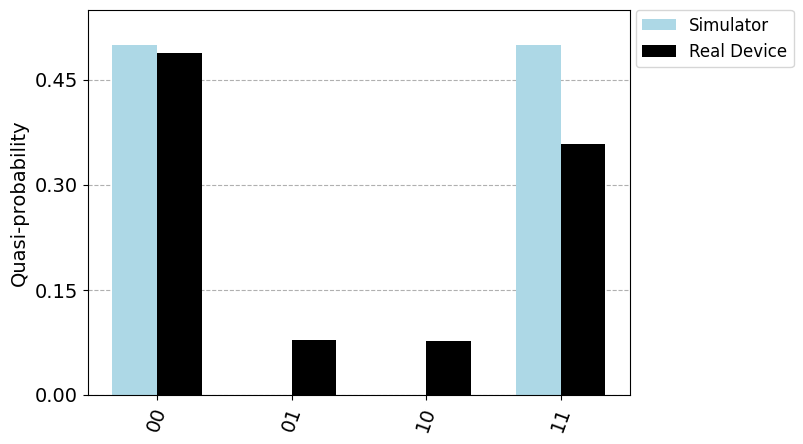

In [7]:
# Compare results from simulator and real device
from qiskit.visualization import plot_distribution

prob_distribution_real = job_real.result().quasi_dists[0].binary_probabilities()

plot_distribution(
    data=[prob_distribution, prob_distribution_real], 
    legend=['Simulator', 'Real Device'], 
    color=['lightblue', 'black'], 
    bar_labels = False
)

# Hands-On Exercises

Build a circuit that results in the state or logic table provided. You can use the Composer or program the circuits here.


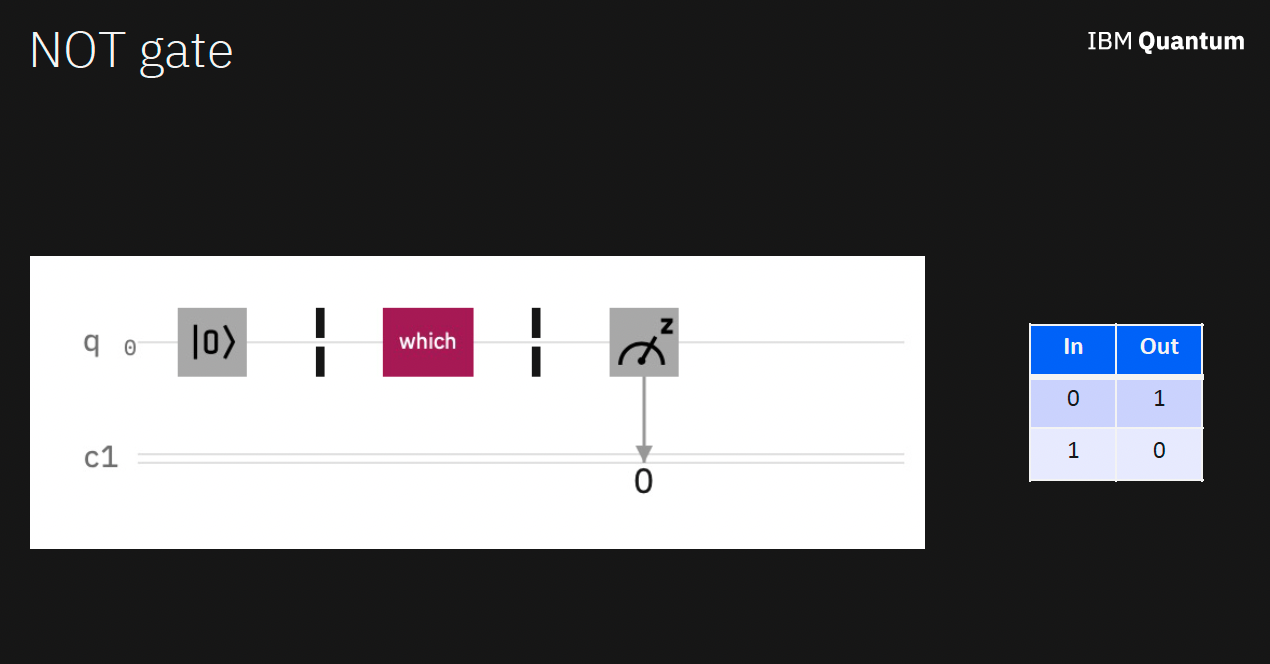

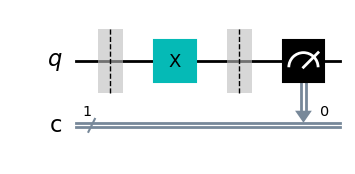

The result when the qubit is initialized in state  0  is: 1


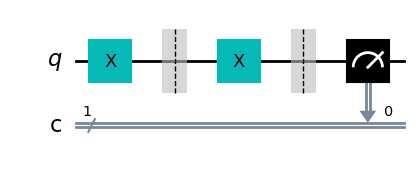

The result when the qubit is initialized in state  1  is: 0


In [8]:
# NOT operation as an example
from qiskit.primitives import Sampler as QiskitSampler

for i in ['0','1']:
    # Prepare circuit
    not_circuit = QuantumCircuit(1,1)
    
    # Initialize qubit state
    if i == '1':
        not_circuit.x(0) 
    not_circuit.barrier()
    
    # Apply NOT operation
    not_circuit.x(0) # this is where you replace 'which'
    not_circuit.barrier()

    # Measure
    not_circuit.measure(0, 0)
    
    display(not_circuit.draw('mpl'))

    # Run the circuit
    sampler = QiskitSampler()
    job = sampler.run(not_circuit)

    # Returns probability distribution
    prob_distribution = job.result().quasi_dists[0]

    print('The result when the qubit is initialized in state ', i,' is:', max(prob_distribution))


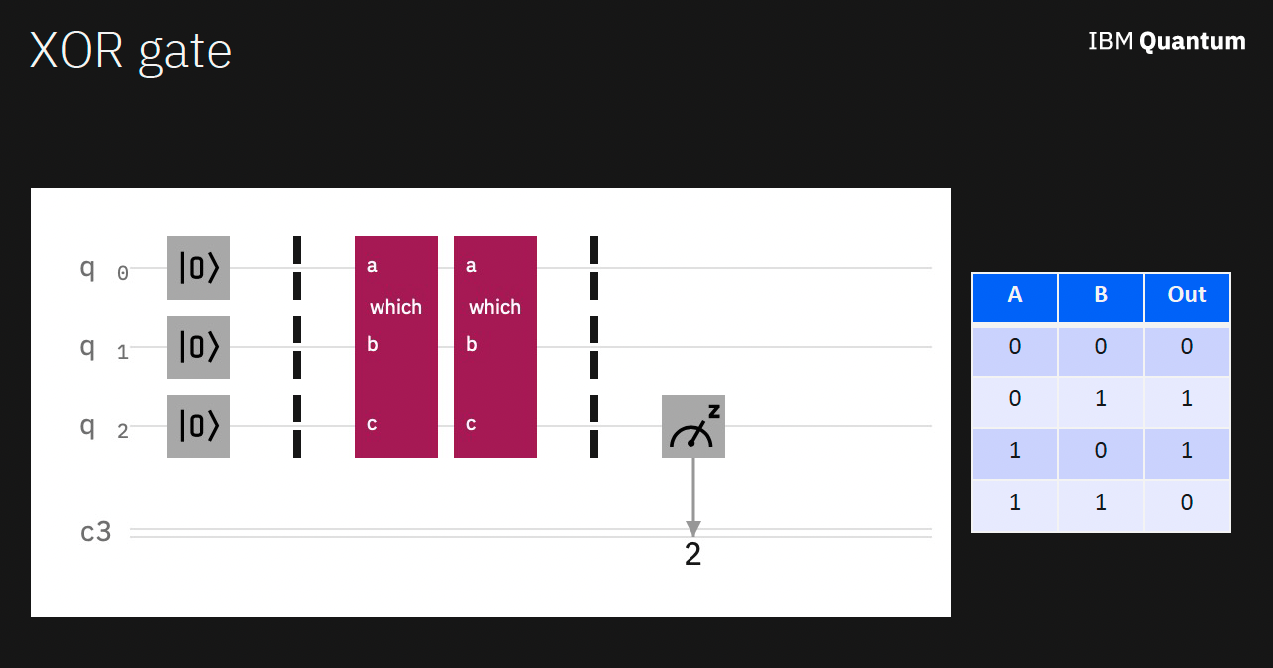

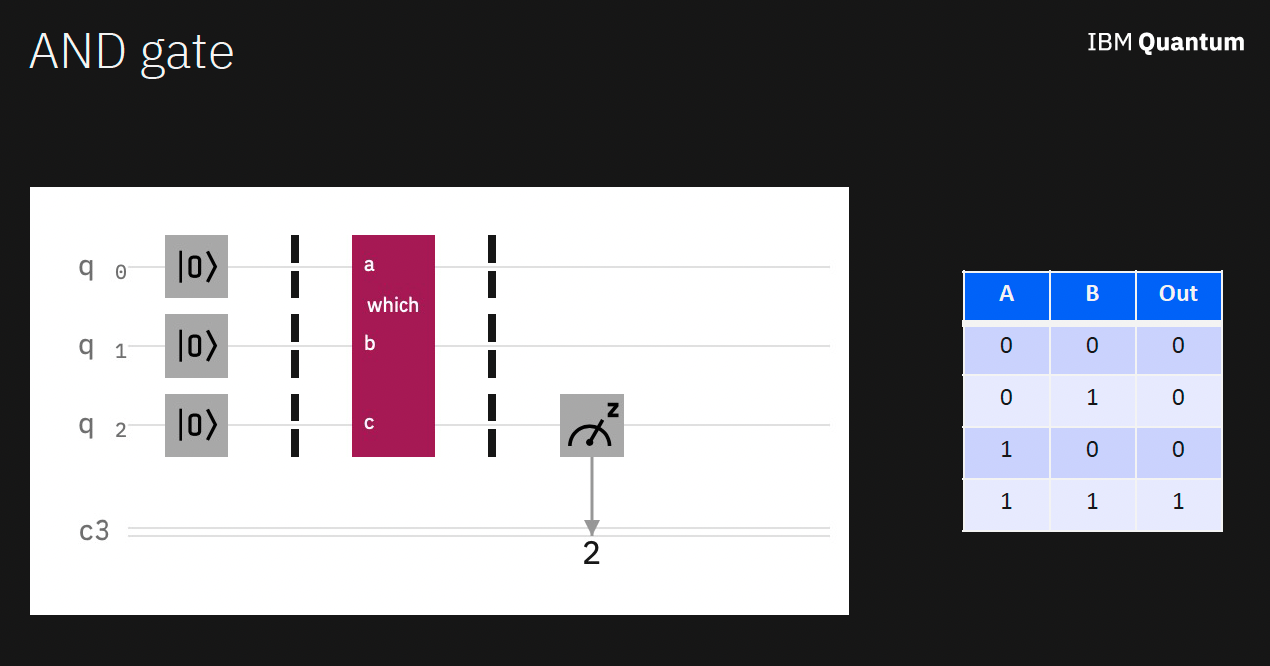

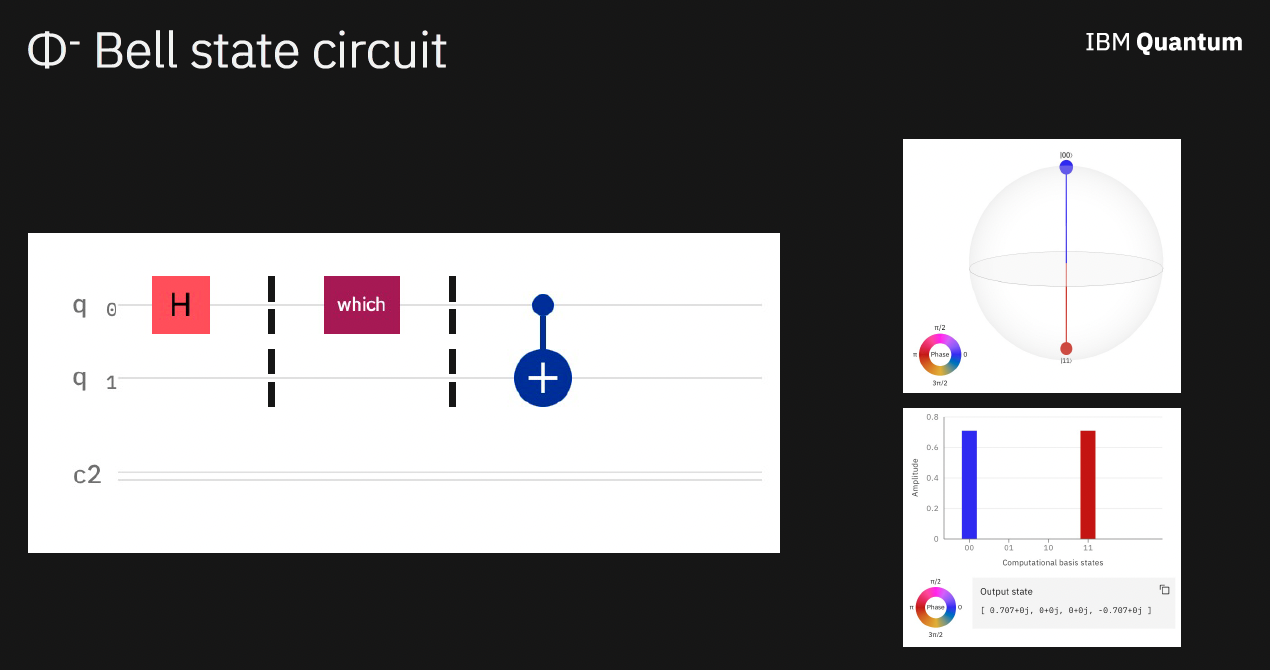

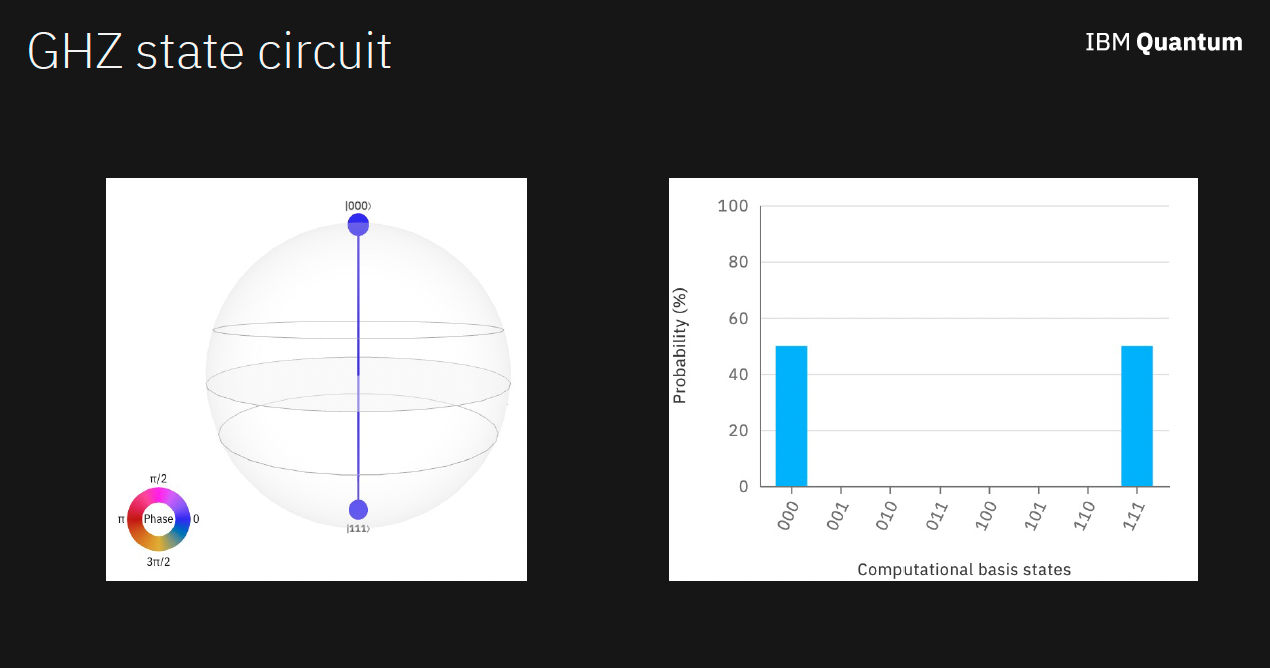